In [3]:
#This practise includes my machine learning practise on all supervised learning algorithims and unsupervised learning 
#and also various error analysis and accuracy results  on each of them.




import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Logistic Regression Analysis

In [4]:
ad_data=pd.read_csv('advertising.csv', index_col=None)

In [5]:
ad_data.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [5]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


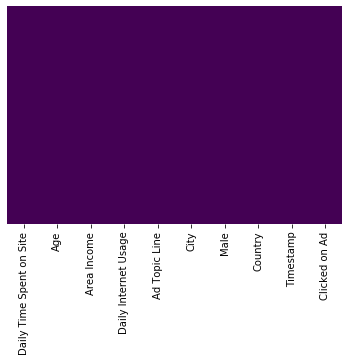

In [7]:
sns.heatmap(ad_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

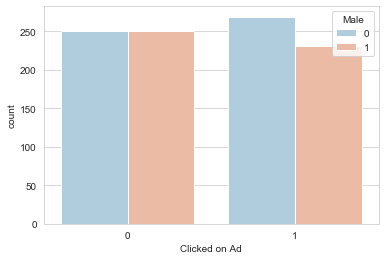

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Clicked on Ad',data=ad_data,palette='RdBu_r', hue='Male')

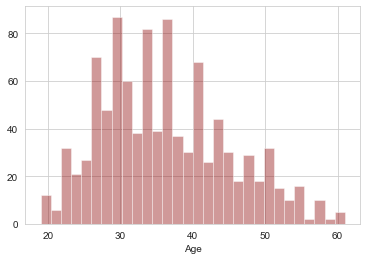

In [10]:
sns.distplot(ad_data['Age'].dropna(),kde=False,color='darkred',bins=30)

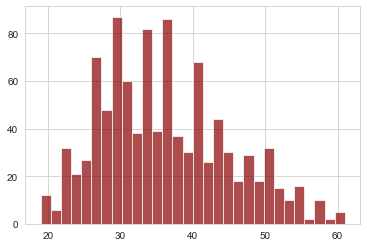

In [11]:
ad_data['Age'].hist(bins=30,color='darkred',alpha=0.7)

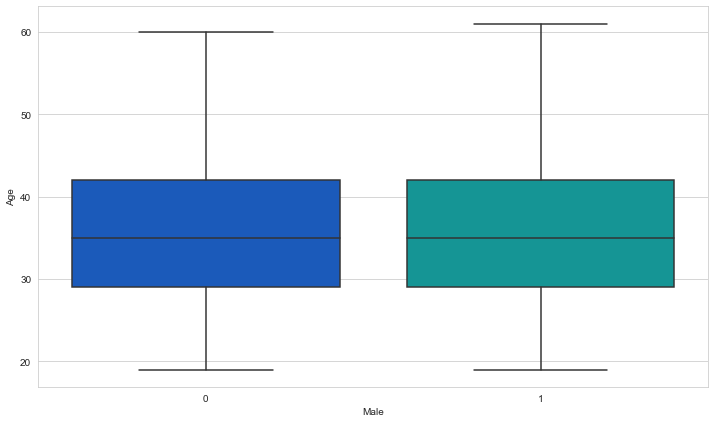

In [12]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Male',y='Age',data=ad_data,palette='winter')

In [13]:
#city = pd.get_dummies(['City'],drop_first=True)
#country = pd.get_dummies(ad_data['Country'],drop_first=True)

In [13]:
ad_datax=ad_data.drop(['City','Country','Ad Topic Line','Timestamp'],axis=1,inplace=True)

In [14]:
#ad_datax 

In [19]:
ad_data.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


In [16]:
from sklearn.preprocessing import StandardScaler


In [52]:
#scaler = StandardScaler(ad_data)
#Scaler.fit(ad_data)


In [ ]:
scaled_data = scaler.transform(ad_data)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(ad_data.drop('Clicked on Ad',axis=1), 
                                                    ad_data['Clicked on Ad'], test_size=0.30, 
                                                    random_state=101)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
predictions = logmodel.predict(X_test)

In [27]:
print(predictions)

[1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 0 1 0
 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1
 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0
 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0
 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0
 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0
 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0
 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0
 1 0 1 0]


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [34]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

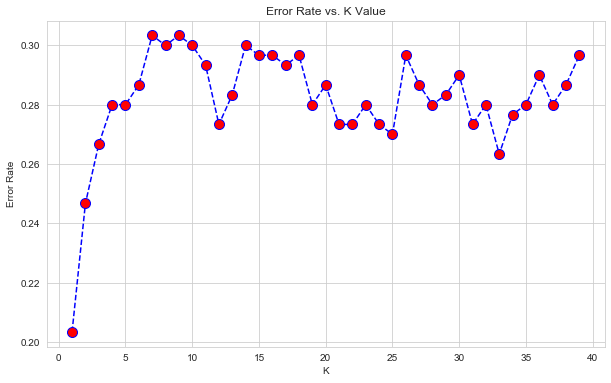

In [35]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [36]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[127  30]
 [ 54  89]]


              precision    recall  f1-score   support

           0       0.70      0.81      0.75       157
           1       0.75      0.62      0.68       143

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



In [37]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [38]:
predictions = dtree.predict(X_test)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       157
           1       0.94      0.95      0.95       143

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[152   5]
 [  9 134]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       157
           1       0.96      0.94      0.95       143

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [42]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [43]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[149   8]
 [  7 136]]


In [44]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       157
           1       0.94      0.95      0.95       143

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [45]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
# May take awhile!
grid.fit(X_train,y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.509, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.511, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.511, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.509, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.511, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.511, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.509, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.511, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.511, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.509, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.511, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.511, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.509, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.697, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.734, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.695, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.765, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.768, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.725, total=   0.0s


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    2.3s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [46]:
grid.best_params_
grid.best_estimator_


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [47]:
grid_predictions = grid.predict(X_test)

In [48]:
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[127  30]
 [ 27 116]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       157
           1       0.79      0.81      0.80       143

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



In [49]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)

kmeans.fit(ad_data.drop('Clicked on Ad',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [50]:
kmeans.cluster_centers_

array([[5.84172396e+01, 3.81979167e+01, 4.10791919e+04, 1.60622344e+02,
        4.81770833e-01],
       [6.91038636e+01, 3.46444805e+01, 6.36779065e+04, 1.92079740e+02,
        4.80519481e-01]])

In [51]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(ad_data['Clicked on Ad'],kmeans.labels_))
print(classification_report(ad_data['Clicked on Ad'],kmeans.labels_))

[[ 84 416]
 [299 201]]
              precision    recall  f1-score   support

           0       0.22      0.17      0.19       500
           1       0.33      0.40      0.36       500

    accuracy                           0.28      1000
   macro avg       0.27      0.29      0.28      1000
weighted avg       0.27      0.28      0.28      1000

